In [14]:
# Importing neccessary packages
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Data Understainding
- First we are going to Load and Inspect the dataset to have a better understanding of the data.

In [3]:
raw_data = './data/raw_analyst_ratings.csv'
df = pd.read_csv(raw_data)

df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Descriptive statistics
- Now we will calculate statistics for headline lengths, count articles per publisher, and analyze publication dates.

In [4]:
# Calculate headline lengths
df['headline_length'] = df['headline'].apply(len)
df['headline_length']

0          39
1          42
2          29
3          44
4          87
           ..
1407323    38
1407324    52
1407325    56
1407326    54
1407327    81
Name: headline_length, Length: 1407328, dtype: int64

In [5]:
# Basic statistics for headline lengths
headline_stats = df['headline_length'].describe()
headline_stats

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [6]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
publisher_counts

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

In [8]:
# Analyze the publication dates
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# Check if there are any NaT (Not a Time) values, which indicate failed conversions
if df['date'].isna().sum() > 0:
    print("Warning: Some dates could not be converted and have been set to NaT.")
    
publication_date_stats = df['date'].describe()
publication_date_stats

count                          1351341
mean     2015-07-06 06:39:44.879020288
min                2009-02-14 00:00:00
25%                2012-12-04 00:00:00
50%                2015-07-21 00:00:00
75%                2018-03-09 00:00:00
max                2020-06-03 00:00:00
Name: date, dtype: object

# Text analysis / Sentiment analysis
- Now we will perform sentiment analysis on the headlines.

In [11]:
# Perform and display sentiment analysis.
df['sentiment'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'].describe()

count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: sentiment, dtype: float64

# Time series analysis
- Now we will analyze and visulaize the frequency of publications over time.

In [12]:
# Resample data by day and count the number of articles
df.set_index('date', inplace=True)
daily_articles = df['headline'].resample('D').count()
daily_articles

date
2009-02-14      1
2009-02-15      0
2009-02-16      0
2009-02-17      0
2009-02-18      0
             ... 
2020-05-30     14
2020-05-31     17
2020-06-01    205
2020-06-02    183
2020-06-03     69
Name: headline, Length: 4128, dtype: int64

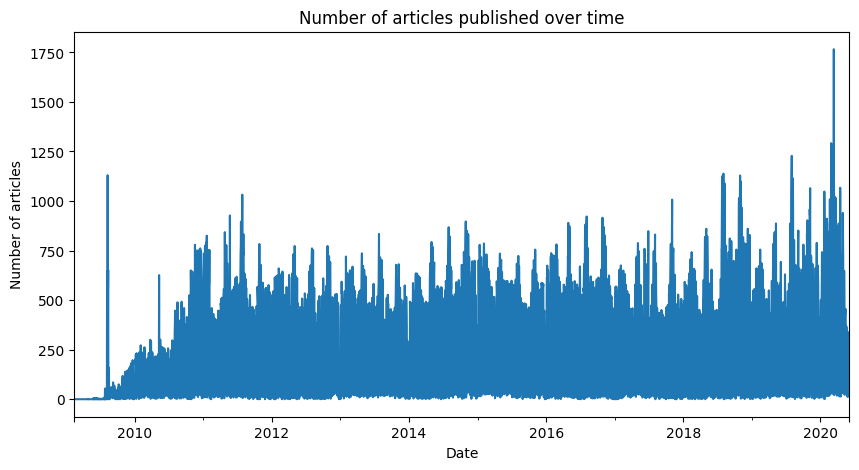

In [15]:
# Plot the number of articles over time
plt.figure(figsize=(10, 5))
daily_articles.plot()
plt.title("Number of articles published over time")
plt.xlabel("Date")
plt.ylabel("Number of articles")
plt.show()